In [1]:
print("Hello world")

Hello world


In [386]:
#ucitavanje biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
import seaborn as sns
#sklearn preprocesiranje
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_classif
#sklearn modeli
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
#sklearn metrike 
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
#from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
#za handlovanje nebalansiranih datasetova
from imblearn.over_sampling import SMOTE
#sklearn model selection
from sklearn.model_selection import GridSearchCV
#sklearn feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
#sklearn cross-validation
from sklearn.model_selection import cross_val_score, cross_validate
#feature reduction sa PCA
from sklearn.decomposition import PCA
#rad sa pipeline-om
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
#genetski algoritmi
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn_genetic import GAFeatureSelectionCV

In [712]:
#ucitavanje data seta

file_name = "Dry_Bean_Dataset.csv"
bean_data = pd.read_csv(file_name)

bean_data.head(10)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [25]:
#svi tipovi podataka su numericki
bean_data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [715]:
#ulazne i izlazna kolona
input_cols = bean_data[bean_data.columns.difference(['Class'])]
output_col = bean_data['Class']

In [27]:
#provera da li ima null vrednosti
bean_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [28]:
#provera da li ima duplikata
duplicates = bean_data.duplicated().sum()
print('Number of duplicates found: ' + str(duplicates))
bean_data = bean_data.drop_duplicates()

Number of duplicates found: 68


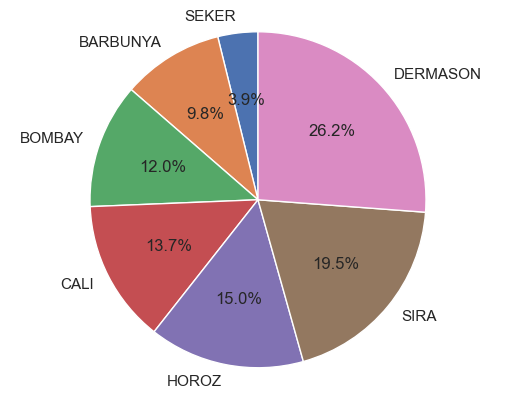

In [29]:
#pie chart
sns.set()
def pie_chart(data):
    labels = pd.unique(data['Class'])
    countByClass = data.groupby('Class').size().sort_values()
    dataSize = data.shape[0]
    sizes= [0]*len(labels)
    for i in range(len(labels)):
        sizes[i] = countByClass[i]/dataSize*100
    fig, ax = plt.subplots()
    ax.pie(sizes,labels = labels, autopct= '%1.1f%%',shadow=False, startangle=90)
    ax.axis('equal')
    plt.show()
pie_chart(bean_data)

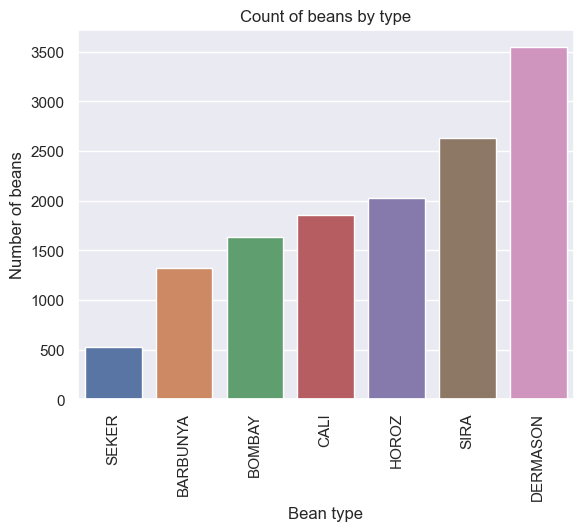

In [8]:
#bar chart
labels = pd.unique(bean_data['Class'])
countByClass = bean_data.groupby('Class').size().sort_values()
sns.barplot(x = labels, y = countByClass,data=bean_data)
plt.title('Count of beans by type')
plt.xlabel('Bean type')
plt.xticks(rotation=90)
plt.ylabel('Number of beans')
plt.show()

In [638]:
def oversampling(data):
    oversample = SMOTE()
    X_oversample, y_oversample = oversample.fit_resample(data[data.columns.difference(['Class'])], data['Class'])
    data_frame = pd.DataFrame(X_oversample)
    data_frame['Class'] = y_oversample
    print('Bean data before oversampling:', data.shape)
    print('Bean data after oversampling: ', X_oversample.shape)
    count_oversample = X_oversample.groupby('Class').size().sort_values()
    sns.barplot(x = labels, y = count_oversample, data = X_oversampleWithClass)
    plt.title('Bean count after oversampling')
    plt.xlabel('Bean type')
    plt.xticks(rotation=90)
    plt.ylabel('Number of beans')
    plt.show()
    return data_frame

Bean data before oversampling: (13611, 17)
Bean data after oversampling:  (24822, 18)


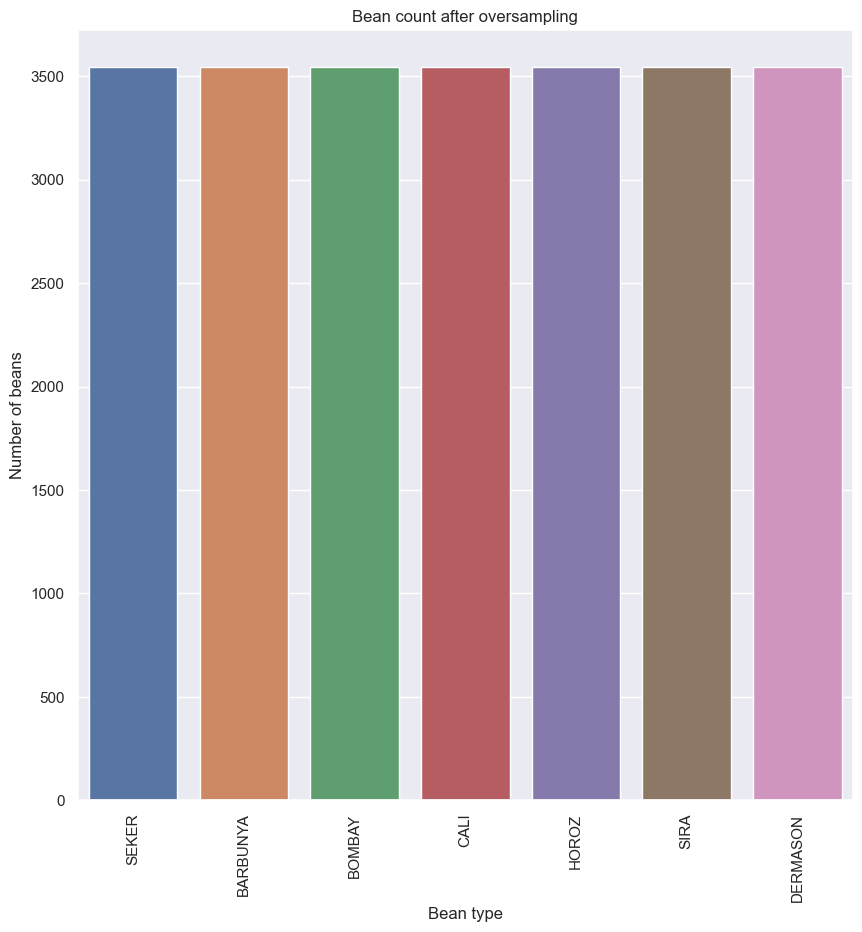

In [452]:
#oversampling 
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(input_cols, output_col)
X_oversampleWithClass = X_oversample.copy()
X_oversampleWithClass['Class']= y_oversample
count_oversample = X_oversampleWithClass.groupby('Class').size().sort_values()

print('Bean data before oversampling:', bean_data.shape)
print('Bean data after oversampling: ', X_oversampleWithClass.shape)

sns.barplot(x = labels, y = count_oversample, data = X_oversampleWithClass)
plt.title('Bean count after oversampling')
plt.xlabel('Bean type')
plt.xticks(rotation=90)
plt.ylabel('Number of beans')
plt.show()


In [139]:
#deskriptivna statistika 
print(bean_data.describe())

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13543.000000  13543.000000     13543.000000     13543.000000   
mean    53048.460385    854.993406       319.895602       202.365321   
std     29392.438324    214.722684        85.809260        45.051632   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36282.500000    703.230000       253.086806       175.886357   
50%     44580.000000    793.896000       296.404589       192.491117   
75%     61382.000000    977.146500       376.312489       217.245403   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13543.000000  13543.000000   13543.000000   13543.000000  13543.000000   
mean       1.581075      0.750315   53767.986709     253.034094      0.749829   
std        0.245245      0.091858   29844.248525      59.307709      0.048939   
min        1.024868      0.

            Feature  Number of Outliers
4      Eccentricity                 833
14         Solidity                 774
13     ShapeFactor4                 760
8   MinorAxisLength                 567
0              Area                 551
3        ConvexArea                 549
10     ShapeFactor1                 533
5     EquivDiameter                 526
9         Perimeter                 500
1      AspectRation                 485
7   MajorAxisLength                 379
6            Extent                 271
12     ShapeFactor3                 202
2       Compactness                 124
15        roundness                  98
11     ShapeFactor2                   0


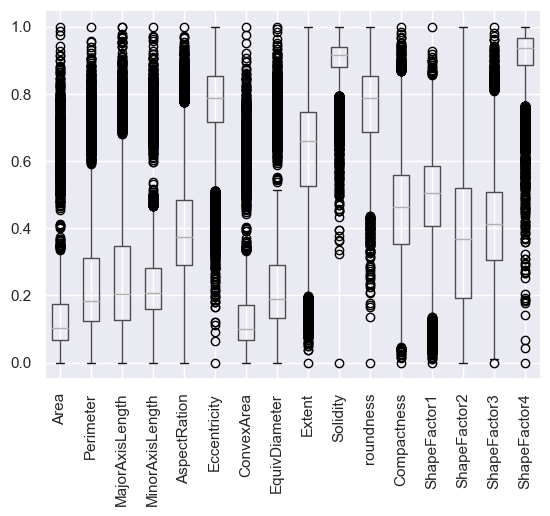

In [77]:
#detekcija outliera pomocu iqr
def find_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3=  df[col_name].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[((df[col_name]<(q1-1.5*iqr)) | (df[col_name]>(q3+1.5*iqr)))]
    return outliers
cols_to_use = bean_data_norm[bean_data.columns.difference(['Class'])]
total_outlier_num=0
cols = cols_to_use.columns.values
num_cols=[]
for col in cols:
    num = find_outliers(cols_to_use, col)
    num_cols.append(len(num))
new_data_frame = pd.DataFrame()
new_data_frame['Feature']= cols
new_data_frame['Number of Outliers']= num_cols
print(new_data_frame.sort_values(by='Number of Outliers', ascending = False))
boxplot = bean_data_norm.boxplot(rot=90)

In [453]:
#detekcija outliera isolation forest, sa pretpostavkom da je 5% outlier-a
best_feature_cols = ['Area', 'ConvexArea', 'EquivDiameter','Perimeter', 'MajorAxisLength', 'MinorAxisLength']
isolation_forest = IsolationForest(n_estimators = 100, contamination = 0.05, max_samples = 'auto')
outlier_prediction = isolation_forest.fit_predict(bean_data[best_feature_cols].values)
print("Number of normal values detected: {}".format(outlier_prediction[outlier_prediction  == 1].sum()))
print("Number of outliers detected: {}".format(abs(outlier_prediction[outlier_prediction == -1].sum())))
bean_data['Is_Outlier'] = outlier_prediction
bean_data_no_outliers = bean_data.copy()
bean_data_no_outliers.drop(bean_data_no_outliers[(bean_data_no_outliers['Is_Outlier'] == -1)].index, axis = 0, inplace=True)
print('Number of values after eliminating outliers: ' + str(len(bean_data_no_outliers)))

Number of normal values detected: 12930
Number of outliers detected: 681
Number of values after eliminating outliers: 12930


In [688]:
def delete_outliers(data):
    isolation_forest = IsolationForest(n_estimators = 100, contamination = 0.05, max_samples = 'auto')
    outlier_prediction = isolation_forest.fit_predict(data[best_feature_cols].values)
    print("Number of normal values detected: {}".format(outlier_prediction[outlier_prediction  == 1].sum()))
    print("Number of outliers detected: {}".format(abs(outlier_prediction[outlier_prediction == -1].sum())))
    data_no_outliers = data.copy()
    data_no_outliers['Is_Outlier'] = outlier_prediction
    data_no_outliers.drop(data_no_outliers[(data_no_outliers['Is_Outlier'] == -1)].index, axis = 0, inplace=True)
    data_no_outliers = data_no_outliers[data_no_outliers.columns.difference(['Is_Outlier'])]
    print('Number of values after eliminating outliers: ' + str(len(data_no_outliers)))
    return data_no_outliers

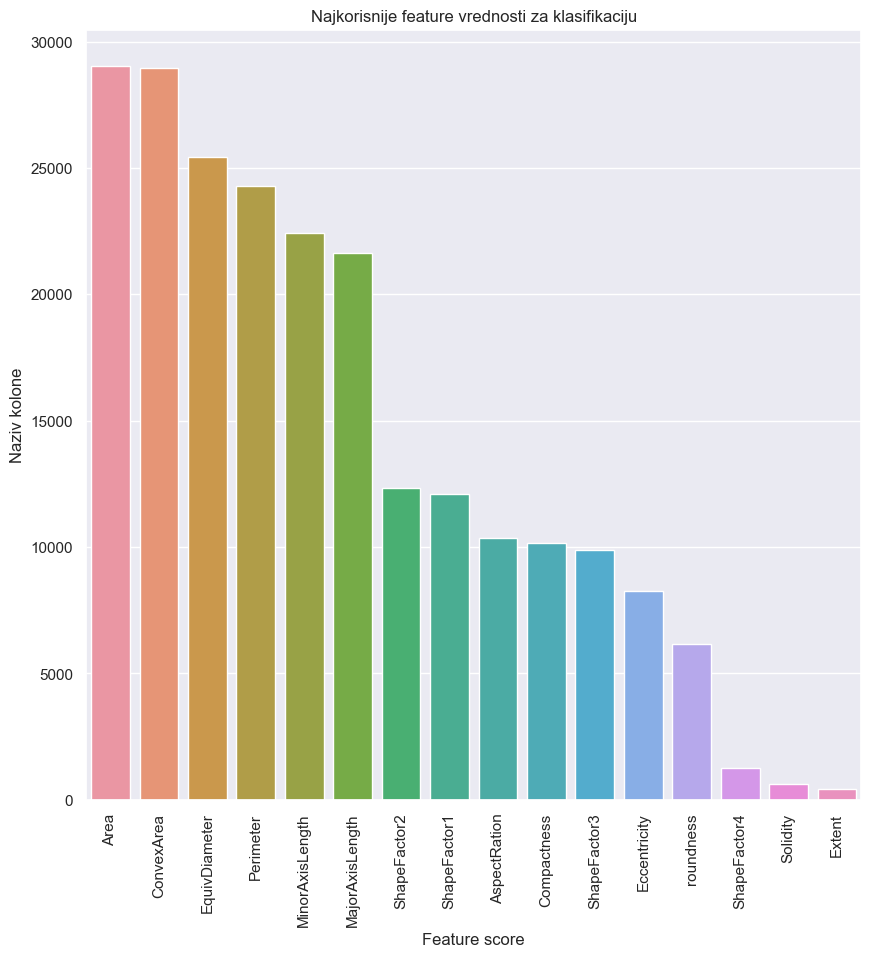

0               Area
3         ConvexArea
5      EquivDiameter
9          Perimeter
8    MinorAxisLength
Name: feature, dtype: object


In [682]:
#feature selection sa ANOVA f-testom, input numericki, output kategoricki
def feature_selection_anova(data, n_features):
    input_cols = data[data.columns.difference(['Class'])]
    output_col = data['Class']
    
    best_features = SelectKBest(score_func = f_classif, k=n_features)
    calc_features = best_features.fit(input_cols,output_col)

    features = pd.DataFrame({'feature' : input_cols.columns.values, 'score' : calc_features.scores_})
    features = features.sort_values(by=['score'] , ascending=False)
    sns.barplot(x=features['feature'], y=features['score'])
    plt.title('Najkorisnije feature vrednosti za klasifikaciju')
    plt.xlabel('Feature score')
    plt.xticks(rotation=90)
    plt.ylabel('Naziv kolone')
    plt.show()
    features_anova = features.head(n_features)
    return features_anova['feature']

print(feature_selection_anova(bean_data,5))

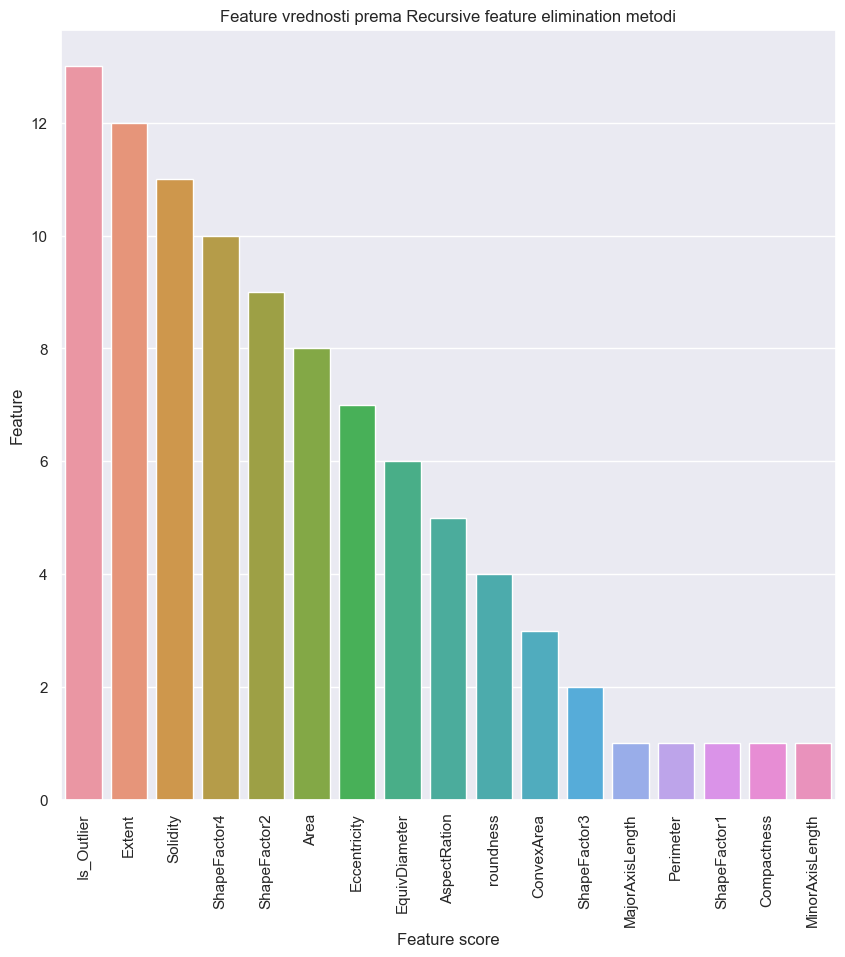

16      Is_Outlier
6           Extent
14        Solidity
13    ShapeFactor4
11    ShapeFactor2
Name: Feature, dtype: object

In [692]:
def recursive_feature_elimination(ml_model, n_features):
    model = ml_model
    rfe = RFE(estimator = model, n_features_to_select = n_features)
    fit_model = rfe.fit(X_train, y_train)
    feature_score = fit_model.ranking_

    features = pd.DataFrame({'Feature' : input_cols.columns.values, 'Feature score' : feature_score})
    features = features.sort_values(by=['Feature score'] , ascending=False)
    sns.barplot(x=features['Feature'], y=features['Feature score'])
    plt.title('Feature vrednosti prema Recursive feature elimination metodi')
    plt.xlabel('Feature score')
    plt.xticks(rotation=90)
    plt.ylabel('Feature')
    plt.show()

    best_recursive_features = features.head(n_features)
    return best_recursive_features['Feature']
    
recursive_feature_elimination(RandomForestClassifier(), 5)

In [347]:
#genetski algoritmi za feature selection 
estimator = RandomForestClassifier()
evolved_estimator = GAFeatureSelectionCV(
    estimator=estimator,
    cv=3,
    scoring="accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)
evolved_estimator.fit(X_train, y_train)

gen_opt_features = evolved_estimator.best_features_
gen_df = pd.DataFrame({'feature': X_train.columns, 'is_used':gen_opt_features})

def highlight_cells(val):
    color = 'yellow' if val == True else ''
    return 'background-color: {}'.format(color)

selected_features = gen_df[gen_df['is_used'] == True]['feature']
gen_df.style.applymap(highlight_cells)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.937139	0.0113789  	0.948029   	0.896518   
1  	60    	0.945953	0.00289872 	0.949755   	0.938417   
2  	60    	0.94799 	0.000838843	0.949468   	0.946647   
3  	60    	0.948182	0.00115114 	0.949468   	0.943424   
4  	60    	0.948806	0.00075434 	0.950676   	0.947165   
5  	60    	0.949326	0.000594928	0.950676   	0.947914   
6  	60    	0.949776	0.000634944	0.951482   	0.948489   
7  	60    	0.950114	0.000763507	0.951482   	0.948662   
8  	60    	0.950517	0.000806962	0.951482   	0.948604   
9  	60    	0.950826	0.000639805	0.951482   	0.94895    
10 	60    	0.950943	0.000417311	0.951482   	0.950101   
11 	60    	0.950891	0.000438828	0.951539   	0.949928   
12 	60    	0.951046	0.000471267	0.95177    	0.949985   
13 	60    	0.950906	0.000607288	0.95177    	0.949813   
14 	60    	0.950926	0.000654084	0.95177    	0.949352   
15 	60    	0.951039	0.000657583	0.95177    	0.948949   
16 	60    	0.951068	0.0006242  	0.952057   	0.94

,feature,is_used
0,Area,True
1,AspectRation,False
2,Compactness,False
3,ConvexArea,False
4,Eccentricity,False
5,EquivDiameter,False
6,Extent,True
7,MajorAxisLength,True
8,MinorAxisLength,False
9,Perimeter,True


In [694]:
#funkcija za vracanje najboljih feature-a po genetskom algoritmu
def features_by_genetic_alg():
    return selected_features
print(features_by_genetic_alg())

0                Area
6              Extent
7     MajorAxisLength
9           Perimeter
11       ShapeFactor2
13       ShapeFactor4
14           Solidity
15          roundness
Name: feature, dtype: object


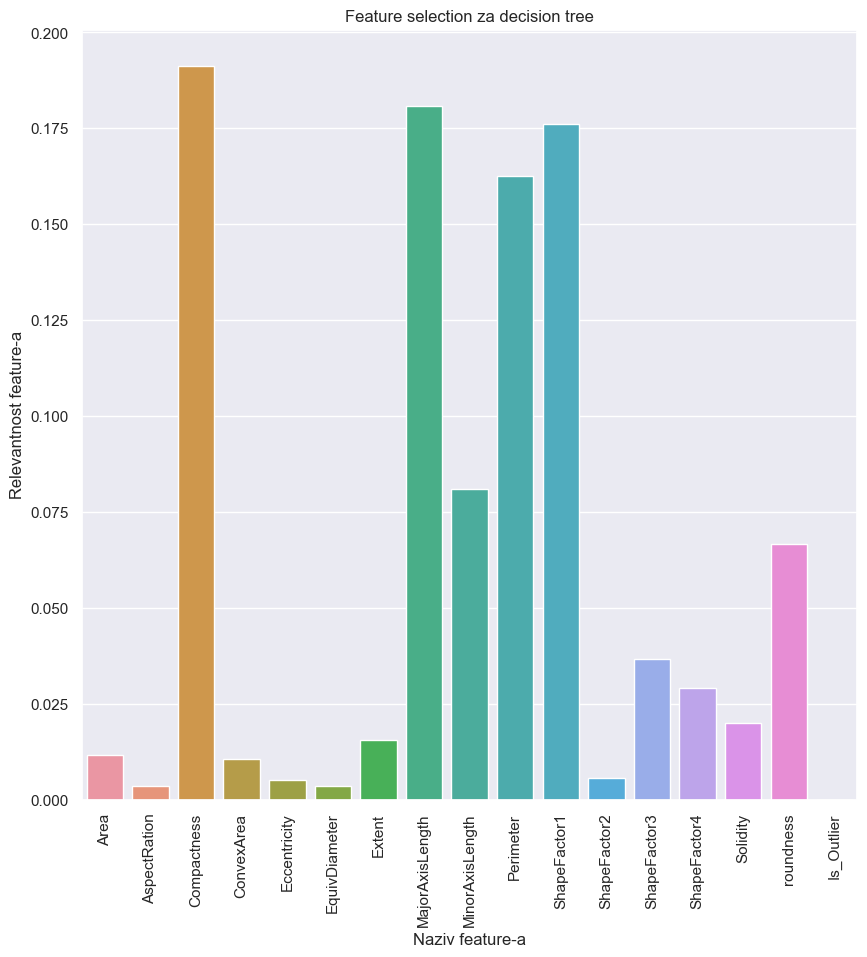

2         Compactness
7     MajorAxisLength
10       ShapeFactor1
9           Perimeter
8     MinorAxisLength
Name: feature_names, dtype: object


In [696]:
#feature selection za decision tree 
def feature_selection_decision_tree(n_features):
    decisionTree.fit(input_cols, output_col)
    values = decisionTree.feature_importances_
    feature_names = input_cols.columns.values
    sns.barplot(x= feature_names, y=values)
    title = 'Feature selection za decision tree'
    plt.title(title)
    plt.xlabel('Naziv feature-a')
    plt.xticks(rotation=90)
    plt.ylabel('Relevantnost feature-a')
    plt.show()
    #pravimo dataframe da bismo zapamtili najrelevantnije feature
    tree_features = pd.DataFrame({'feature_names':feature_names, 'values':values})
    tree_features = tree_features.sort_values(by='values', ascending=False).head(n_features)
    tree_features = tree_features['feature_names']
    return tree_features
print(feature_selection_decision_tree(5))

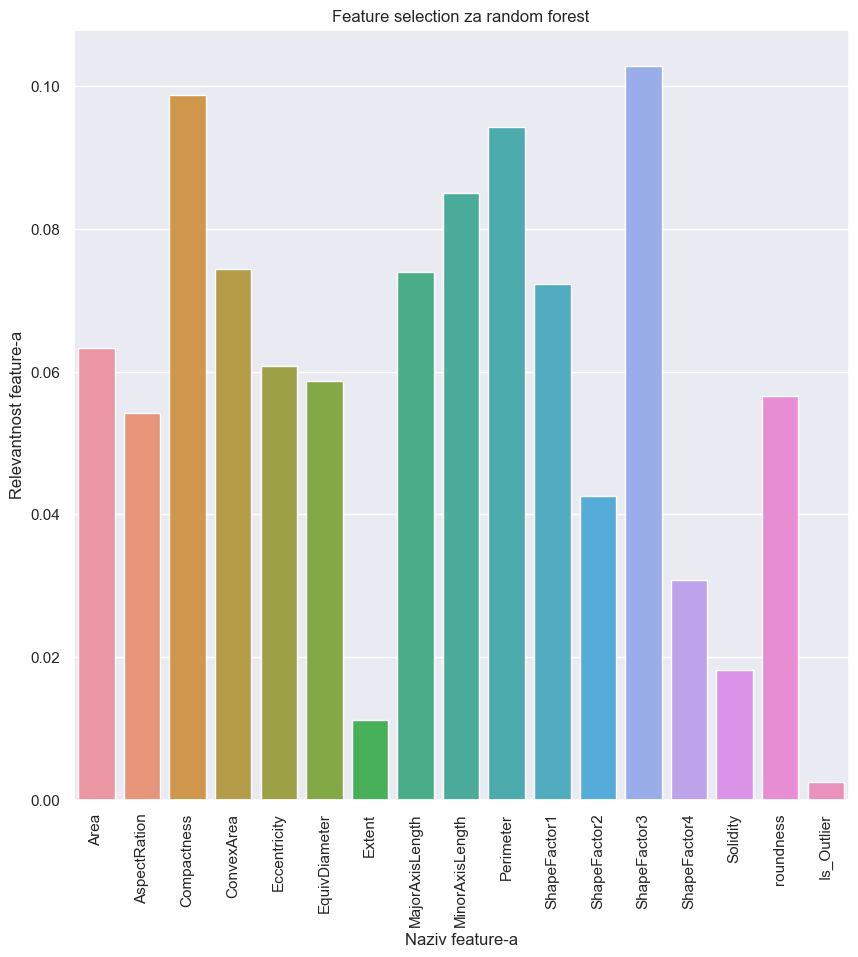

12       ShapeFactor3
2         Compactness
9           Perimeter
8     MinorAxisLength
3          ConvexArea
Name: feature_names, dtype: object


In [698]:
def feature_selection_random_forest(n_features):
    random_forest.fit(input_cols, output_col)
    values = random_forest.feature_importances_
    feature_names = input_cols.columns.values
    forest_features = pd.DataFrame({'feature_names':feature_names, 'values':values})
    forest_features = forest_features.sort_values(by='values', ascending=False).head(n_features)
    sns.barplot(x= feature_names, y=values)
    title = 'Feature selection za random forest'
    plt.title(title)
    plt.xlabel('Naziv feature-a')
    plt.xticks(rotation=90)
    plt.ylabel('Relevantnost feature-a')
    plt.show()
    #cuvanje najkorisnijih feature-a
    forest_features = forest_features['feature_names']
    return forest_features
print(feature_selection_random_forest(5))

Classification report sa svim feature-ima za PCA: 
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.88      0.90       423
      BOMBAY       1.00      1.00      1.00       141
        CALI       0.90      0.95      0.92       457
    DERMASON       0.94      0.83      0.88      1103
       HOROZ       0.97      0.92      0.95       585
       SEKER       0.93      0.97      0.95       573
        SIRA       0.78      0.91      0.84       781

    accuracy                           0.90      4063
   macro avg       0.92      0.92      0.92      4063
weighted avg       0.91      0.90      0.90      4063

Classification report sa redukovanim feature-ima za PCA: 
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.88      0.91       423
      BOMBAY       1.00      1.00      1.00       141
        CALI       0.87      0.96      0.91       457
    DERMASON       0.93      0.88      0.91      1103
       HOROZ       0.97

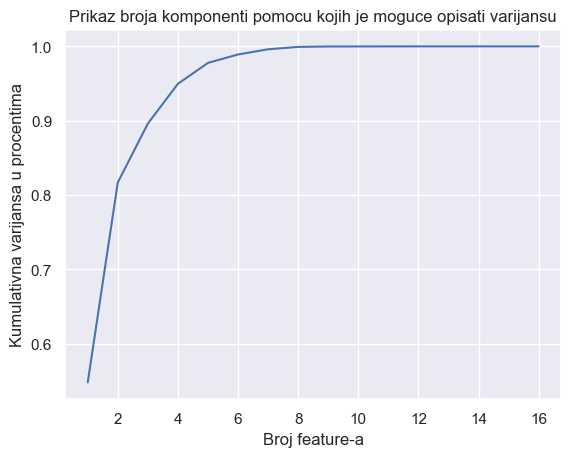

In [287]:
#principal component analysis za feature reduction

#X_train i X_test setove cemo standardizovati zbog rada sa PCA
X_std = bean_data_std[bean_data_std.columns.difference(['Class'])]
y_std = bean_data_std['Class']
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.3)

pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
#print(pca.explained_variance_ratio_*100)

fig, ax = plt.subplots()
x = np.arange(1,17, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Broj feature-a')
plt.ylabel('Kumulativna varijansa u procentima')
plt.title('Prikaz broja komponenti pomocu kojih je moguce opisati varijansu')
plt.plot(x,y)
clr = RandomForestClassifier()
clr.fit(X_train, y_train)

y_pred_pca = clr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_pca)
print('Classification report sa svim feature-ima za PCA: \n' + (classification_report(y_test, y_pred_pca)))

#broj komponenti predstavljen vrednoscu nakon koje se uocava zaravnjenje krive
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
clr = RandomForestClassifier()
clr.fit(X_train, y_train)

y_pred_pca = clr.predict(X_test)
print('Classification report sa redukovanim feature-ima za PCA: \n' + (classification_report(y_test, y_pred_pca)))


In [330]:
#Linear Discriminant Analysis (LDA) za feature reduction
#maksimalan moguc broj komponenti je (broj klasa - 1)
steps = [('lda', LinearDiscriminantAnalysis(n_components=5)), ('model', RandomForestClassifier())]
model = Pipeline(steps=steps)
cv = KFold(n_splits = 10)
n_scores = cross_val_score(model, X_test, y_test, scoring = 'accuracy', cv=cv, n_jobs = -1)
print('Accuracy: %.3f ' % (n_scores.mean()))

Accuracy: 0.942 


In [44]:
# standardno skaliranje
num_cols = bean_data.select_dtypes(include=['int64','float64']).columns
standard_scaler = StandardScaler()
#pravimo kopiju da originalni set ne bi bio promenjen
bean_data_std = bean_data.copy()
bean_data_std[num_cols]= standard_scaler.fit_transform(bean_data_std[num_cols])
bean_data_std.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.838800,-1.139663,-1.301976,-0.632111,-1.565363,-2.182833,-0.839489,-1.060491,0.287981,0.366476,1.420346,1.838628,0.681918,2.398280,1.924811,0.838679,SEKER
1,-0.827266,-1.010529,-1.391169,-0.435758,-1.972460,-3.685504,-0.824175,-1.041410,0.697598,-0.465886,0.224987,2.497622,0.369551,3.097472,2.691446,0.771141,SEKER
2,-0.805287,-1.075303,-1.247807,-0.586775,-1.514305,-2.042229,-0.806818,-1.005357,0.577958,0.517614,1.248979,1.764053,0.604373,2.231086,1.840150,0.917418,SEKER
3,-0.783920,-0.973894,-1.274241,-0.440595,-1.742960,-2.740196,-0.772170,-0.970686,0.671302,-2.248692,0.509588,2.082211,0.403254,2.511258,2.204306,-0.202372,SEKER
4,-0.779429,-1.093821,-1.375750,-0.268281,-2.121534,-4.535823,-0.782457,-0.963445,0.475476,0.804605,1.872434,2.768598,0.120215,3.267675,3.016333,0.940406,SEKER


In [647]:
# min max skaliranje, vrednosti su od nula do jedan
num_cols = bean_data.select_dtypes(include=['int64','float64']).columns
minmax_scaler = MinMaxScaler()
#pravimo kopiju da originalni set ne bi bio promenjen
bean_data_norm = bean_data.copy()
bean_data_norm[num_cols]= minmax_scaler.fit_transform(bean_data_norm[num_cols])
bean_data_norm.head()

,Area,AspectRation,Class,Compactness,ConvexArea,Eccentricity,EquivDiameter,Extent,MajorAxisLength,MinorAxisLength,Perimeter,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Solidity,roundness
0,0.011996,0.122612,SEKER,0.786733,0.011649,0.477797,0.021152,0.671024,0.018029,0.133008,0.009592,0.697090,0.824498,0.750996,0.980620,0.926500,0.934823
1,0.014239,0.051577,SEKER,0.903549,0.014628,0.278472,0.025032,0.735504,0.000000,0.169049,0.036445,0.635933,0.965642,0.884987,0.974979,0.874986,0.793138
2,0.018514,0.131521,SEKER,0.773514,0.018005,0.496448,0.032362,0.716671,0.028978,0.141330,0.022975,0.681908,0.790747,0.736200,0.987196,0.935854,0.914511
3,0.022669,0.091623,SEKER,0.829912,0.024746,0.403864,0.039410,0.731365,0.023635,0.168161,0.044063,0.642531,0.847305,0.799846,0.893675,0.764648,0.826871
4,0.023543,0.025565,SEKER,0.951583,0.022744,0.165680,0.040883,0.700538,0.003117,0.199789,0.019124,0.587117,1.000000,0.941770,0.989116,0.953616,0.988408


In [145]:
#one hot encoding za target klasu, ali ne koristimo
encoder = OneHotEncoder() #jer nema ordera izmedju klasa
bean_data_new = pd.DataFrame(encoder.fit_transform(bean_data[['Class']]).toarray())
bean_data_enc = bean_data.join(bean_data_new)
#treba da izbacimo Class kolonu 
bean_data_enc.drop('Class', inplace=True, axis=1)
bean_data_enc.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor3,ShapeFactor4,Is_Outlier,0,1,2,3,4,5,6
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.834222,0.998724,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,...,0.909851,0.998430,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.825871,0.999066,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.861794,0.994199,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.941900,0.999166,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [719]:
#train_test_split funkcija
X_train, X_test, y_train, y_test = train_test_split(input_cols, output_col, test_size=0.3)

In [675]:
#odabir modela za testiranje klasifikacije
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()
grad_boosting = GradientBoostingClassifier()

In [720]:
models = [
            ('Decision Tree', decision_tree), 
            ('Gaussian Naive Bayes', naive_bayes), 
            ('K-Nearest Neighbors', knn), 
            ('Random Forest', random_forest),
            ('Gradient Boosting', grad_boosting)]
results = []
results_accuracy = []
results_precision = []
results_recall = []
results_f1 = []
names = []
k_fold = KFold(n_splits=10)
for name, model in models:
    cv_res = cross_validate(model, X_train, y_train, cv=k_fold, scoring=['accuracy', 'precision_macro', 'recall_macro','f1_macro'])
    results.append(cv_res)
    results_accuracy.append(cv_res['test_accuracy'].mean())
    results_precision.append(cv_res['test_precision_macro'].mean())
    results_recall.append(cv_res['test_recall_macro'].mean())
    results_f1.append(cv_res['test_f1_macro'].mean())
    names.append(name)

In [721]:
#tabelarni prikaz rezultata za razlicite modele bez preprocesiranja
diff_models_res = pd.DataFrame({'Model name': names,
                                'Accuracy': results_accuracy,
                                'Precision': results_precision, 
                                'Recall': results_recall,
                                'F1': results_f1})
print(diff_models_res)

             Model name  Accuracy  Precision    Recall        F1
0         Decision Tree  0.890101   0.904900  0.904397  0.904331
1  Gaussian Naive Bayes  0.760679   0.767620  0.762801  0.759862
2   K-Nearest Neighbors  0.709351   0.719793  0.707255  0.710536
3         Random Forest  0.921905   0.934986  0.930847  0.932677
4     Gradient Boosting  0.923061   0.937176  0.933369  0.935054


In [ ]:
#deo sa podesavanjem hiperparametara

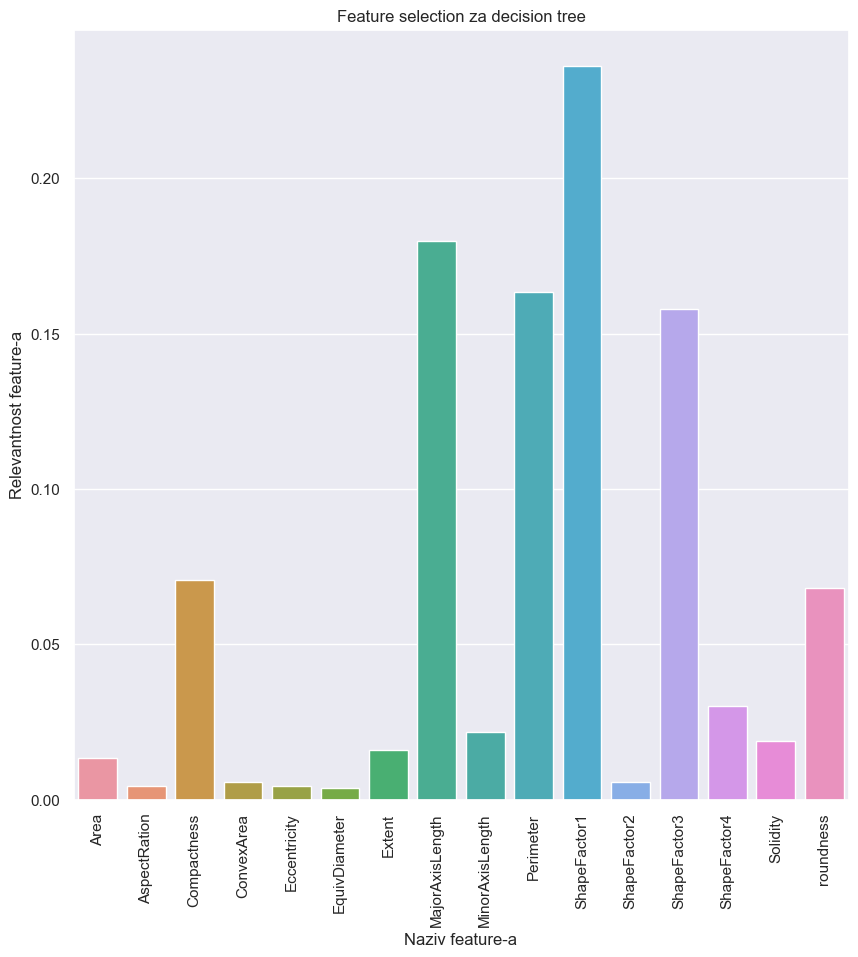

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
DecisionTreeClassifier(max_depth=9, max_leaf_nodes=9, random_state=42)
Accuracy: 0.88
Classification report: 
              precision    recall  f1-score   support

    BARBUNYA       0.79      0.90      0.84       377
      BOMBAY       1.00      0.99      0.99       163
        CALI       0.89      0.79      0.84       478
    DERMASON       0.89      0.93      0.91      1064
       HOROZ       0.93      0.89      0.91       589
       SEKER       0.96      0.84      0.89       621
        SIRA       0.80      0.86      0.83       792

    accuracy                           0.88      4084
   macro avg       0.89      0.88      0.89      4084
weighted avg       0.88      0.88      0.88      4084



In [726]:
#podesavanje hiperparametara za decision tree
parameters = {'max_leaf_nodes': list(range(2,10)), 
              'min_samples_split':[2,3,4],
              'max_depth': [2,3,5,9,10],
              'criterion': ['gini', 'entropy']}
#selekcija feature-a za decision tree
tree_features = feature_selection_decision_tree(6)
decisionTree = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(decisionTree, parameters,verbose=1,cv=10, n_jobs = -1)
best_model = grid_search_cv.fit(X_train[tree_features], y_train)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test[tree_features])
print('Accuracy: {:.2f}'.format(best_model.score(X_test[tree_features], y_test)))
print('Classification report: ')
print(classification_report(y_test, y_preds))

In [ ]:
#vizuelizacija decision tree-a
fig = plt.figure(figsize=(50,20))
feat_names = X_train.columns[feature_selector.get_support()]
tree.plot_tree(new_model, feature_names=feat_names ,class_names =output_col.values)
fig.savefig("dec_tree.png")

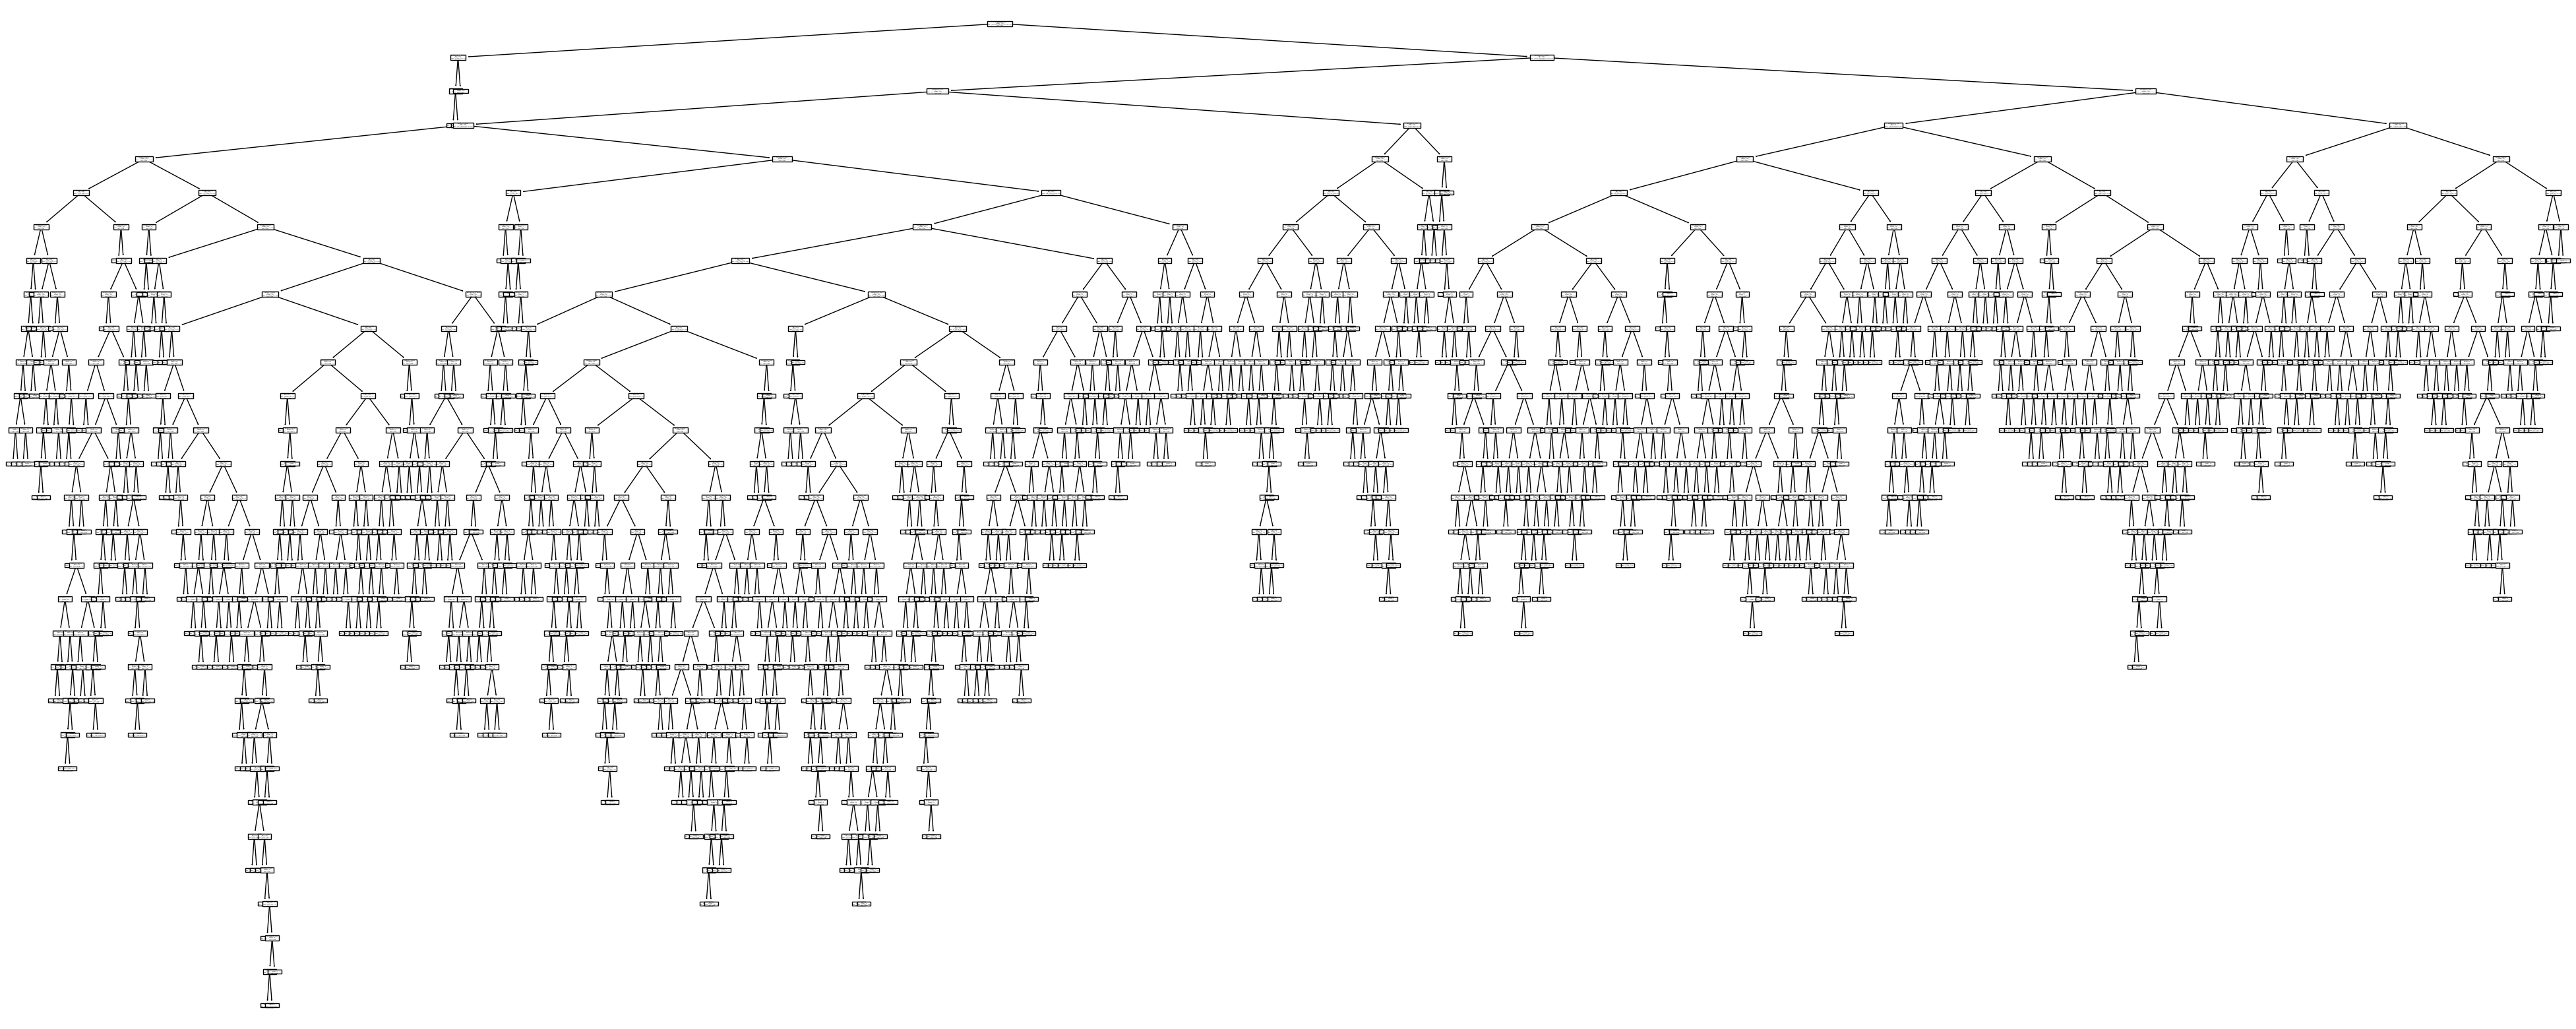

In [123]:
#vizuelizacija decision tree-a
fig = plt.figure(figsize=(50,20))
feat_names = X_train.columns[feature_selector.get_support()]
tree.plot_tree(new_model, feature_names=feat_names ,class_names =output_col.values)
fig.savefig("dec_tree.png")

In [ ]:
#podesavanje hiperparametara za random forest
parameters = {'n_estimators':[10,20,50], 
              'criterion': ['gini', 'entropy'],
              'max_features': list(range(3,8)),
              'max_depth': [2,4,9]
               }
random_forest = RandomForestClassifier(random_state=42)
grid_search_cv = GridSearchCV(random_forest, parameters,verbose=1,cv=5, n_jobs = -1)
best_model = grid_search_cv.fit(X_train[forest_features], y_train)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test[forest_features])
print('Accuracy: {:.2f}'.format(best_model.score(X_test[forest_features], y_test)))
print('Classification report: ')
print(classification_report(y_test, y_preds))

In [734]:
#podesavanje hiperparametara za k-nearest-neighbors
parameters = {'n_neighbors': list(range (1,10)), 
              'leaf_size' : list(range(1,10)),
              'metric': ['euclidean', 'manhattan', 'minkowski'], 
              'weights': ['uniform', 'distance']}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)
best_model = grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test)
print('Accuracy: {}'.format(best_model.score(X_test, y_test)))
print('Classification report: ')
print(classification_report(y_test, y_preds))

Fitting 10 folds for each of 486 candidates, totalling 4860 fits
KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=6,
                     weights='distance')
Accuracy: 0.7928501469147894
Classification report: 
              precision    recall  f1-score   support

    BARBUNYA       0.62      0.55      0.58       377
      BOMBAY       1.00      0.99      1.00       163
        CALI       0.70      0.74      0.72       478
    DERMASON       0.84      0.91      0.87      1064
       HOROZ       0.83      0.79      0.81       589
       SEKER       0.90      0.72      0.80       621
        SIRA       0.72      0.79      0.76       792

    accuracy                           0.79      4084
   macro avg       0.80      0.79      0.79      4084
weighted avg       0.80      0.79      0.79      4084



In [ ]:
#podesavanje hiperparametara za gradient boosting
parameters = {"n_estimators":[5,50,70,100],
              "max_depth":[1,3,5,7,9,11],
              "learning_rate":[0.01,0.1,1,10,100]}
grid_search_cv = GridSearchCV(GradientBoostingClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)
best_model = grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test)
print('Accuracy: {}'.format(best_model.score(X_test, y_test)))
print('Classification report: ')
print(classification_report(y_test, y_preds))

In [ ]:
#podesavanje hiperparametara za naive bayes
parameters = {'var_smoothing': np.logspace(0,-9,num=100)}
grid_search_cv = GridSearchCV(GaussianNB(), parameters,verbose=1,cv=10, n_jobs = -1)
best_model = grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test)
print('Accuracy: {}'.format(best_model.score(X_test, y_test)))
print('Classification report: ')
print(classification_report(y_test, y_preds))

In [ ]:
#odabir modela za testiranje klasifikacije
decision_tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, random_state=42)
knn = KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=6, weights='distance')
random_forest = RandomForestClassifier()
grad_boosting = GradientBoostingClassifier()
naive_bayes = GaussianNB()

Bean data before oversampling: (13611, 17)
Bean data after oversampling:  (24822, 17)


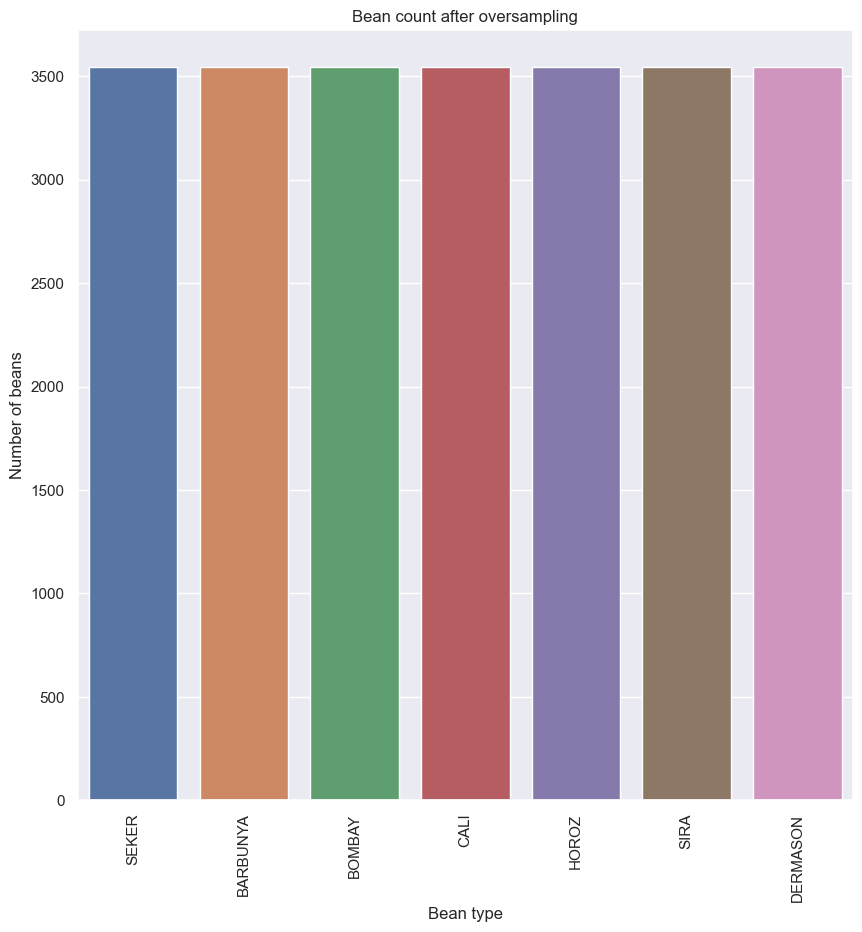

Number of normal values detected: 23580
Number of outliers detected: 1242
Number of values after eliminating outliers: 23580
        Area  AspectRation  Class  Compactness  ConvexArea  Eccentricity  \
0      28395      1.197191  SEKER     0.913358       28715      0.549812   
1      28734      1.097356  SEKER     0.953861       29172      0.411785   
2      29380      1.209713  SEKER     0.908774       29690      0.562727   
3      30008      1.153638  SEKER     0.928329       30724      0.498616   
4      30140      1.060798  SEKER     0.970516       30417      0.333680   
...      ...           ...    ...          ...         ...           ...   
24817  51511      1.658562   SIRA     0.775443       52067      0.797598   
24818  53274      1.672072   SIRA     0.769854       54210      0.801272   
24819  48055      1.633149   SIRA     0.781844       48453      0.790432   
24820  39989      1.387254   SIRA     0.847590       40457      0.691719   
24821  45960      1.529268   SIRA     0

In [722]:
#preprocesiranje podataka
bean_data = oversampling(bean_data)
bean_data = delete_outliers(bean_data)
print(bean_data)
results = []
results_accuracy = []
results_precision = []
results_recall = []
results_f1 = []
names = []
for name, model in models:
    cv_res = cross_validate(model, X_train, y_train, cv=k_fold, scoring=['accuracy', 'precision_macro', 'recall_macro','f1_macro'])
    results.append(cv_res)
    results_accuracy.append(cv_res['test_accuracy'].mean())
    results_precision.append(cv_res['test_precision_macro'].mean())
    results_recall.append(cv_res['test_recall_macro'].mean())
    results_f1.append(cv_res['test_f1_macro'].mean())
    names.append(name)


In [723]:
#tabelarni prikaz rezultata za razlicite modele nakon preprocesiranja 
diff_models_res = pd.DataFrame({'Model name': names,
                                'Accuracy': results_accuracy,
                                'Precision': results_precision, 
                                'Recall': results_recall,
                                'F1': results_f1})
print(diff_models_res)

             Model name  Accuracy  Precision    Recall        F1
0         Decision Tree  0.891151   0.905242  0.905142  0.904901
1  Gaussian Naive Bayes  0.760679   0.767620  0.762801  0.759862
2   K-Nearest Neighbors  0.709351   0.719793  0.707255  0.710536
3         Random Forest  0.921695   0.934590  0.930725  0.932400
4     Gradient Boosting  0.922641   0.936689  0.933082  0.934655


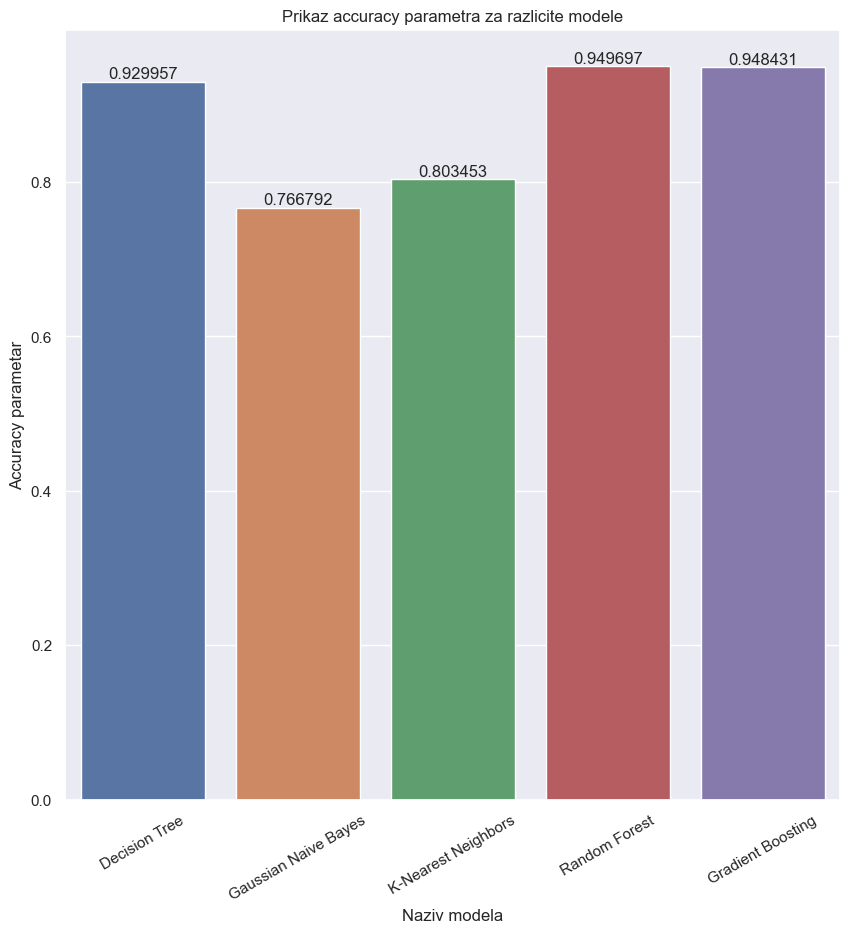

In [376]:
#vizuelizacija rezultata za accuracy
frame = pd.DataFrame({'model_name':names, 'accuracy':results_accuracy})
ax = sns.barplot(x = frame['model_name'], y=frame['accuracy'])
for i in ax.containers:
    ax.bar_label(i,)
title = 'Prikaz accuracy parametra za razlicite modele'
plt.title(title)
plt.xlabel('Naziv modela')
plt.xticks(rotation=30)
plt.ylabel('Accuracy parametar')
plt.show()

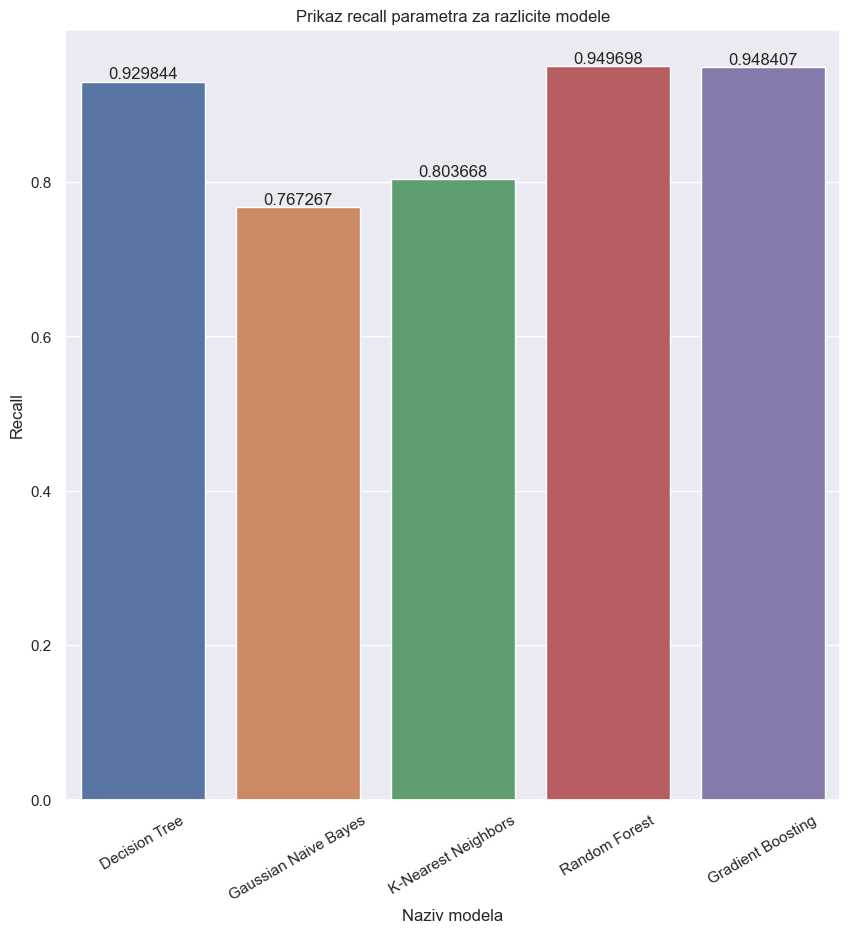

In [377]:
#vizuelizacija rezultata za recall
frame = pd.DataFrame({'model_name':names, 'recall':results_recall})
ax = sns.barplot(x = frame['model_name'], y=frame['recall'])
for i in ax.containers:
    ax.bar_label(i,)
title = 'Prikaz recall parametra za razlicite modele'
plt.title(title)
plt.xlabel('Naziv modela')
plt.xticks(rotation=30)
plt.ylabel('Recall')
plt.show()

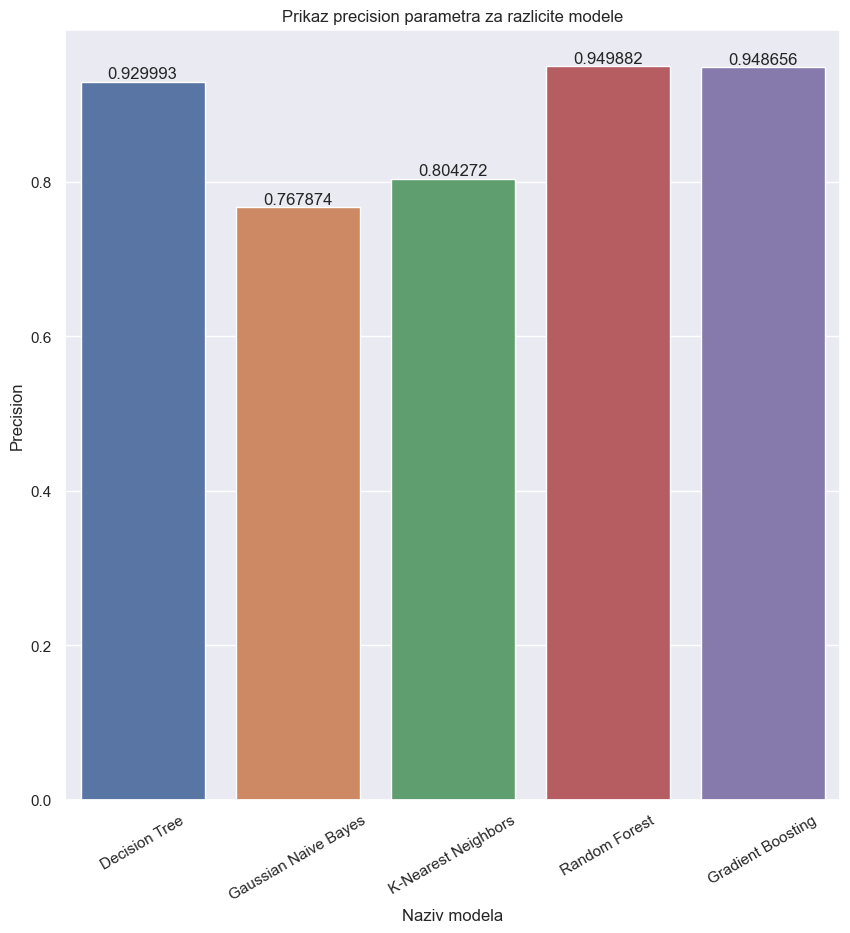

In [378]:
#vizuelizacija rezultata za precision parametar
frame = pd.DataFrame({'model_name':names, 'precision':results_precision})
ax = sns.barplot(x = frame['model_name'], y=frame['precision'])
for i in ax.containers:
    ax.bar_label(i,)
title = 'Prikaz precision parametra za razlicite modele'
plt.title(title)
plt.xlabel('Naziv modela')
plt.xticks(rotation=30)
plt.ylabel('Precision')
plt.show()

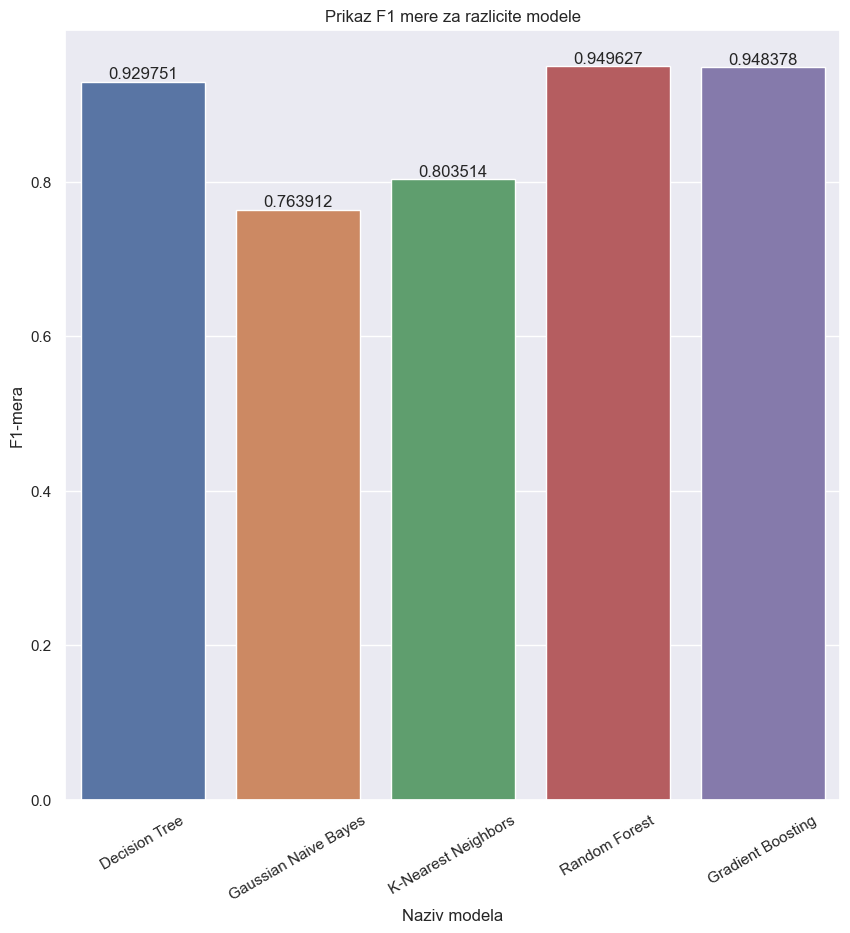

In [379]:
#vizuelizacija rezultata za f1 parametar
frame = pd.DataFrame({'model_name':names, 'f1':results_f1})
ax = sns.barplot(x = frame['model_name'], y=frame['f1'])
for i in ax.containers:
    ax.bar_label(i,)
title = 'Prikaz F1 mere za razlicite modele'
plt.title(title)
plt.xlabel('Naziv modela')
plt.xticks(rotation=30)
plt.ylabel('F1-mera')
plt.show()

In [343]:
#primena neuronskih mreza na problem klasifikacije
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter= 90,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

pipeline = Pipeline(steps = [
    ('scaling', StandardScaler()),
    ('model', mlp)
])
trained_model = pipeline.fit(X_train, y_train)
y_preds = trained_model.predict(X_test)
plt.show()

cv = KFold(n_splits = 10)
n_scores = cross_val_score(trained_model, X_test, y_test, scoring = 'accuracy', cv=cv, n_jobs = -1)
print('Accuracy: %.3f ' % (n_scores.mean()))

Iteration 1, loss = 0.28207878
Iteration 2, loss = 0.15659835
Iteration 3, loss = 0.15068885
Iteration 4, loss = 0.14594828
Iteration 5, loss = 0.14458342
Iteration 6, loss = 0.14280942
Iteration 7, loss = 0.13986824
Iteration 8, loss = 0.13912862
Iteration 9, loss = 0.13795832
Iteration 10, loss = 0.13725411
Iteration 11, loss = 0.13656857
Iteration 12, loss = 0.13609150
Iteration 13, loss = 0.13477073
Iteration 14, loss = 0.13383751
Iteration 15, loss = 0.13350861
Iteration 16, loss = 0.13143851
Iteration 17, loss = 0.13163223
Iteration 18, loss = 0.12948207
Iteration 19, loss = 0.12997739
Iteration 20, loss = 0.13020671
Iteration 21, loss = 0.13194289
Iteration 22, loss = 0.13045946
Iteration 23, loss = 0.13038059
Iteration 24, loss = 0.12936671
Iteration 25, loss = 0.12762643
Iteration 26, loss = 0.12846445
Iteration 27, loss = 0.12773946
Iteration 28, loss = 0.12699247
Iteration 29, loss = 0.12834271
Iteration 30, loss = 0.12743444
Iteration 31, loss = 0.12651585
Iteration 32, los

In [354]:
#primena genetskih algoritama na problem klasifikacije
parameters = {'n_estimators':[10,50,100], 
              'criterion': ['gini', 'entropy'],
              'max_features': list(range(3,8)),
              'max_depth': [2,4,9]
               }
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 11),
              'max_leaf_nodes': Integer(2, 15),
              'n_estimators': Integer(100,300)}

clf = RandomForestClassifier()

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                              cv=cv,
                              scoring='accuracy',
                              n_jobs=-1,
                              param_grid = param_grid,
                              verbose=True)

evolved_estimator.fit(X_train, y_train)

KeyboardInterrupt: 